# Análisis lineal por discriminante (LDA)

**Ejercicio:** Comparar LDA vs PCA

Pasos para realizar un LDA (Fisher).
- Calcular los vectores de medias de dimensión $r$ para las distintas clases de nuestro conjunto de datos.
- Calcular las matrices de tipo *scatter*.
- Calcular los eigenvectores con sus respectivos eigenvalores.
- Limpieza de datos con respecto a un orden y se eligen los eigenvalores de manera decreciente y escogemos los $k$ eigenvalores más lejanos y formamos la matriz de tamaño $r\times k$.
- Transformamos ortogonalmente esta base de datos.

In [1]:
import pandas as pd

In [2]:
iris_dict = {i : label for i, label in zip(
    range(4),
    ("sepal length in cm",
     "sepal width in cm",
     "petal lenght in cm",
     "petal width in cm",)
) }

In [3]:
df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(iris_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) 

df.head()

,sepal length in cm,sepal width in cm,petal lenght in cm,petal width in cm,class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## LDA para Iris

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [5]:
X = std.fit_transform(df.iloc[:,range(0,4)].values)

y = df["class label"].values 

encoder = LabelEncoder()

label_encoder = encoder.fit(y)

y = label_encoder.transform(y) + 1

label_dict = {1: "Setosa", 2: "Versicolor", 3: "Virginica"}

In [6]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt 
%matplotlib inline 
import math 
import numpy as np


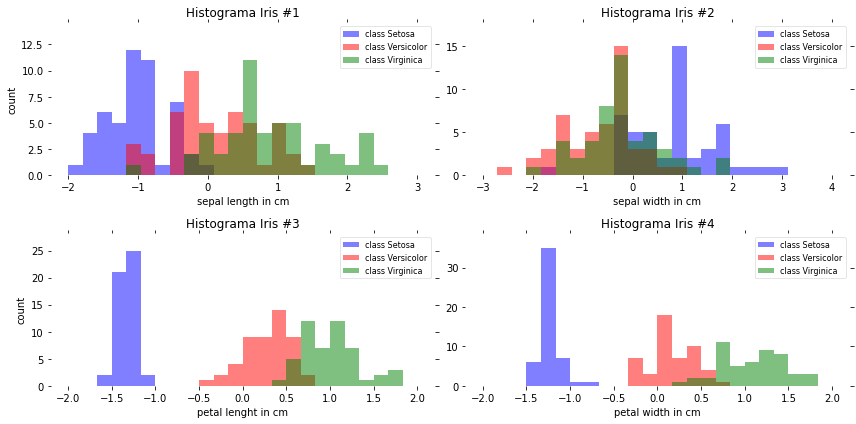

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):  

  
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(iris_dict[cnt])
    ax.set_title('Histograma Iris #%s' %str(cnt+1))

    
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

In [8]:
y = encoder.fit_transform(df["class label"].values)

In [9]:
SW = np.zeros((4,4))

for i in range(3):
  SW += np.cov(X[y==i].T)

In [10]:
SW

array([[1.16722735, 0.78296373, 0.34611786, 0.18386817],
       [0.78296373, 1.8615894 , 0.21806165, 0.30505192],
       [0.34611786, 0.21806165, 0.1796358 , 0.09541594],
       [0.18386817, 0.30505192, 0.09541594, 0.21784923]])

In [11]:
N = np.bincount(y) 
vect=[]

[vect.append(np.mean(X[y==i], axis=0)) for i in range(3)]

media = np.mean(X, axis = 0)

SM = np.zeros((4,4))

for i in range(3):
     SM+=N[i]*(((vect[i]-media).reshape(4,1)).dot(((vect[i]-media).reshape(1,4))))

In [12]:
SM

array([[ 92.80585961, -54.77061003, 113.8033484 , 113.68350465],
       [-54.77061003,  58.78211947, -73.76243518, -68.42915731],
       [113.8033484 , -73.76243518, 141.19784603, 139.73818372],
       [113.68350465, -68.42915731, 139.73818372, 139.3253878 ]])

In [13]:
egvl, egvt = np.linalg.eig(np.linalg.inv(SW).dot(SM))
egp =[(np.abs(egvl[i]), egvt[:,i]) for i in range(3) ]

In [14]:
egp = sorted(egp, key=lambda k: k[0], reverse=True) 

In [15]:
W=np.hstack((egp[0][1][:, ].reshape(4,1),egp[1][1][:, ].reshape(4,1))).real
X_train_lda = X.dot(W)

In [16]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,-1.790936,-0.115414,0
1,-1.583202,0.265463,0
2,-1.663881,0.083657,0
3,-1.514646,0.225901,0
4,-1.807076,-0.189973,0


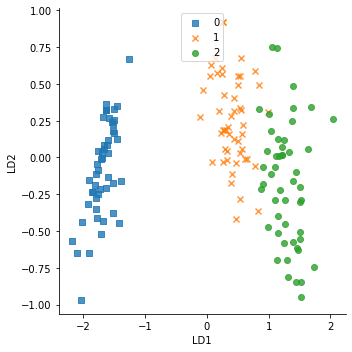

In [17]:
import seaborn as sns

markers = ['s', 'x','o']
sns.lmplot(x="LD1", y="LD2", data=data, markers=markers,fit_reg=False, hue='class', legend=False)
plt.legend(loc='upper center')
plt.show()

explained variance ratio (first two components): [0.92461872 0.05306648]


Text(0.5, 1.0, 'PCA IRIS ')

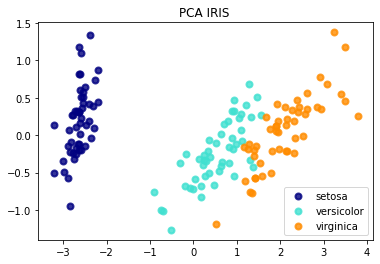

In [20]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA IRIS ")



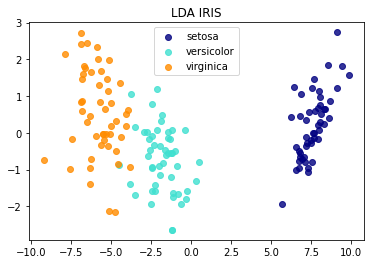

In [21]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA IRIS")

plt.show()

$$\mathcal{N}(x\mid \mu,\Sigma)=\frac{1}{(2\pi)^{r/2}}\frac{1}{\sqrt{\mid \det \Sigma \mid}}\exp\left\{-\frac{1}{2}(x-\mu)^{t}\Sigma^{-1}(x-\mu)\right\}$$

In [19]:
def gaussian(self, X):
    means = {}
    covariance = {}
    priors = {}  # p(Ck)
    for class_id, values in X.items():
        proj = np.dot(values, self.W)
        means[class_id] = np.mean(proj, axis=0)
        covariance[class_id] = np.cov(proj, rowvar=False)

        priors[class_id] = values.shape[0] / self.N
    return means, covariance, priors

def gaussian_distribution(self, x, u, cov):
    scalar = (1. / ((2 * np.pi) ** (x.shape[0] / 2.))) * (1 / np.sqrt(np.linalg.det(cov)))
    x_sub_u = np.subtract(x, u)
    return scalar * np.exp(-np.dot(np.dot(x_sub_u, inv(cov)), x_sub_u.T) / 2.) 